In [161]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

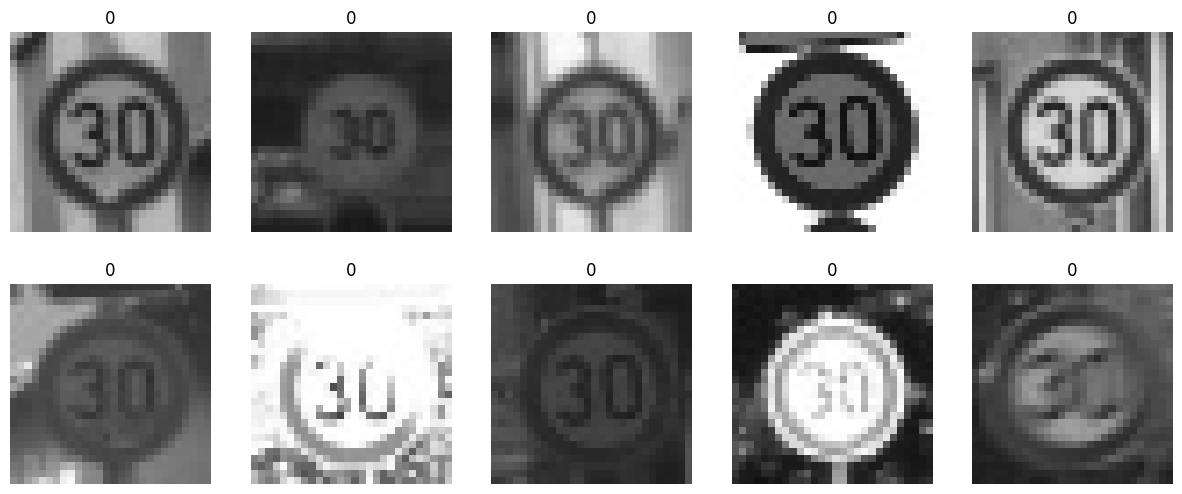

In [162]:
folder = 'data/subset_homework/'

fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

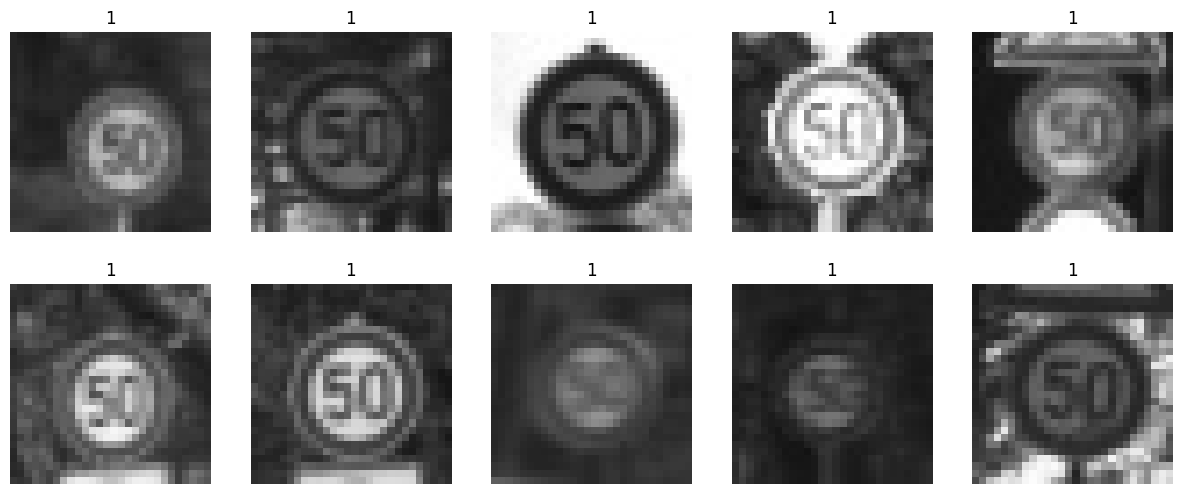

In [163]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [164]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [165]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [166]:
pixels = np.array([image.flatten() for image in images])
print('Shape', pixels.shape)

Shape (4470, 784)


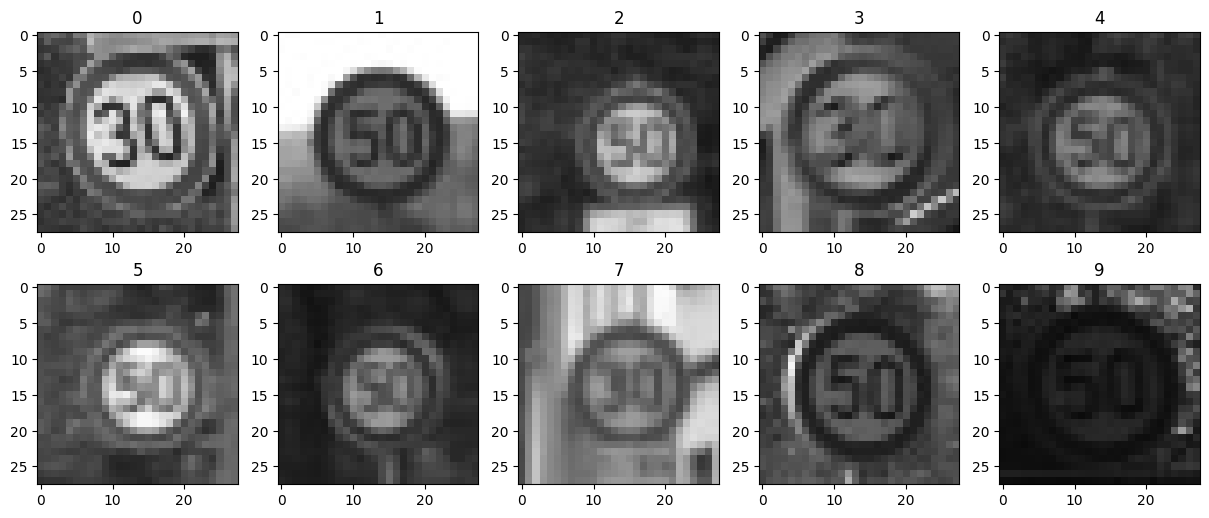

In [167]:
for cnt, idx in enumerate(np.random.randint(0, len(images) - 10, 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[cnt], cmap="gray", vmin=0, vmax=255)
    plt.title(cnt)

In [168]:
import tensorflow as tf


In [169]:
inputs = tf.keras.layers.Input(shape=(pixels[0].shape))
outputs = tf.keras.layers.Dense(1, activation='linear')(inputs)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

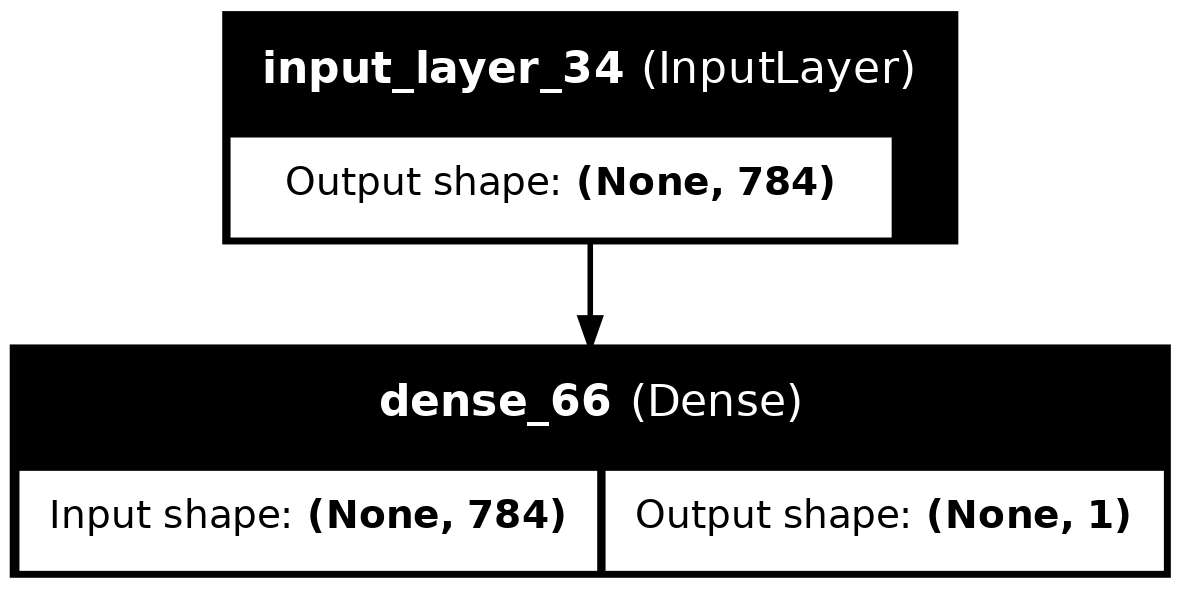

In [170]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [171]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [172]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 4585.3569
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 1013.8290
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 750.1676
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 478.9525
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 393.5059
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 325.6378
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 302.1750
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 253.3221
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 222.8842
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 202.1669


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

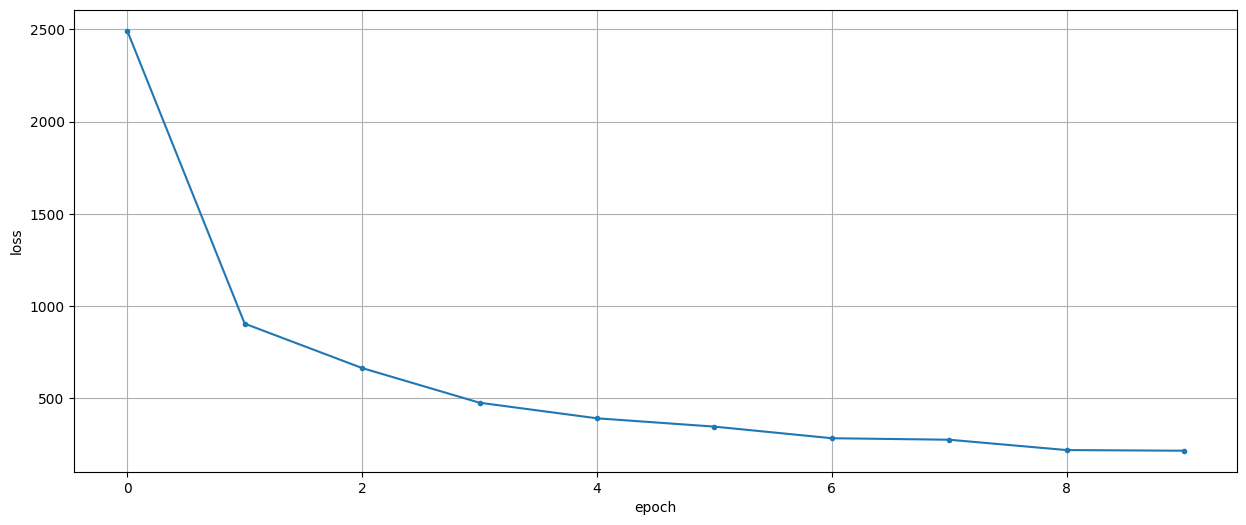

In [173]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[-0.02671024] [-0.02671024]


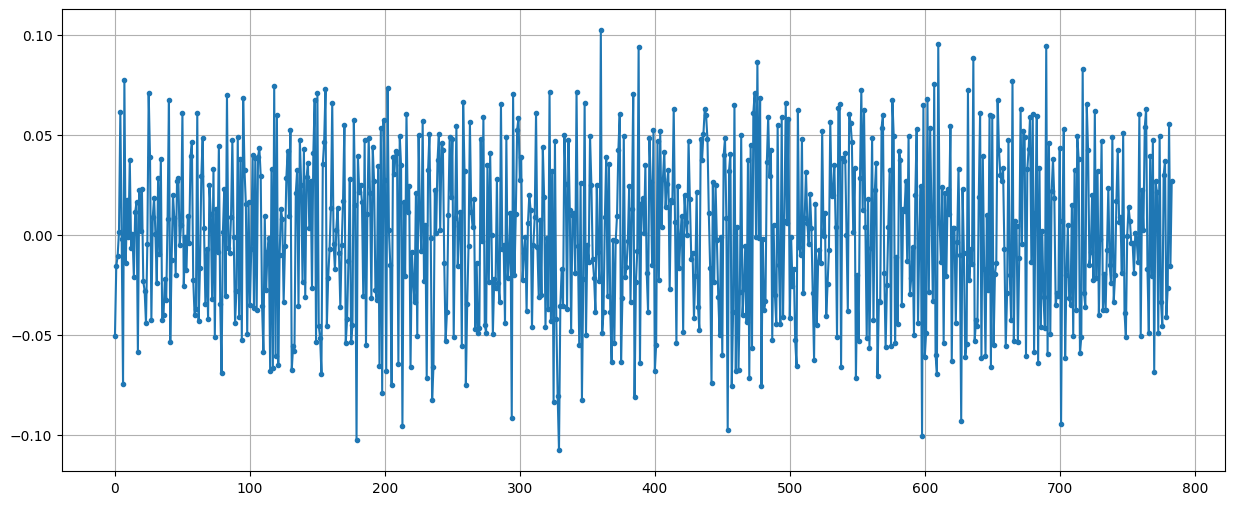

In [174]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [175]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
Accuracy 0.5060402684563758


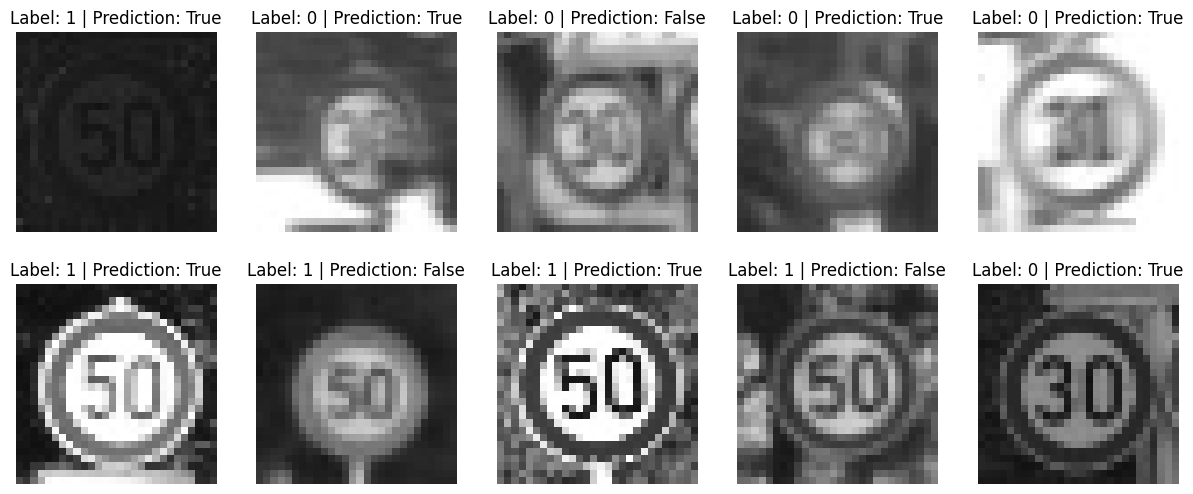

In [176]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

As we can see the accuracy is very bad, let's try to modify the network

In [182]:
inputs = tf.keras.layers.Input(shape=(pixels[0].shape))
outputs = tf.keras.layers.Dense(16, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(16, activation='sigmoid')(outputs)
outputs = tf.keras.layers.Dense(16, activation='softmax')(outputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(outputs)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,121 (51.25 KB)

 Trainable params: 13,121 (51.25 KB)

 Non-trainable params: 0 (0.00 B)

In [183]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - loss: 0.3638 
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.2515
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.2499
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.2501
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.2501
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.2501
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.2501
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.2501
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.2502
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.2500


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

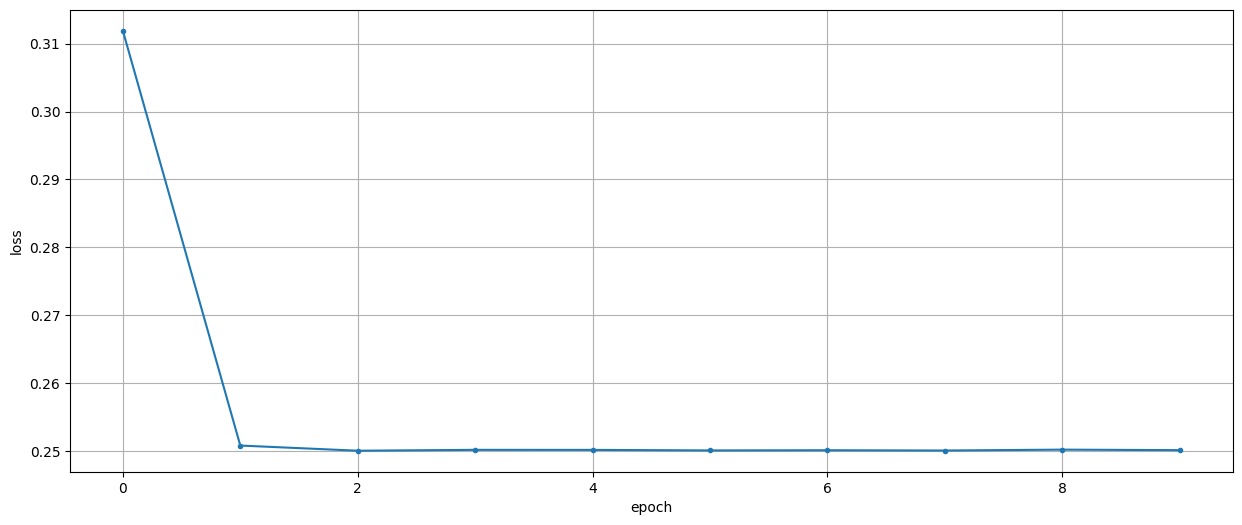

In [184]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [185]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('New accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
New accuracy 0.5033557046979866


# Results
As we can see, no matter how many layers I add, what activation functions I use, and how many epochs I use for training, I cannot achieve accuracy higher than around 50%.